Not sure why but Tensorflow is being annoying and isn't training the full training set of size 825, and is only training 55. I'll just upload the csv I get from running the python script on my local machine. 
I thought it was that it was because their tensorflow was under version 2.0, but it's above that, so idk what's going on. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
TRAINING_SIZE = 0.8
TESTING_SIZE = 0.2
EXPORT_LOGISTIC_REGRESSION = True
EXPORT_RANDOM_FOREST = True
EXPORT_DECISION_TREES = True
EXPORT_NEURAL_NETWORK = True

In [ ]:
def one_hot_encode(df, features):
    new_df = df.copy(deep=True)
    for feature in features:
        unique_vals = np.unique(df[feature].to_numpy())
        for val in unique_vals:
            new_df[feature + "_" + str(val)] = df[feature].apply(lambda x: int(x == val))
    return new_df.drop(features, axis=1)

def convert_export_list_to_df(export_list):
    df = pd.DataFrame()
    order = ["Model", "Training Accuracy", "Testing Accuracy", "Overall Accuracy", "Precision", "Recall"]
    for i in range(len(order)):
        df[order[i]] = [x[i] for x in export_list]
    return df

def calculate_sklearn_model_info(model, X, y, random_state):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TESTING_SIZE, train_size=TRAINING_SIZE, random_state=random_state)
    model.fit(x_train, y_train)
    testing_predictions = model.predict(x_test)
    training_accuracy = model.score(x_train, y_train)
    testing_accuracy = model.score(x_test, y_test)
    precision = precision_score(y_test, testing_predictions)
    recall = recall_score(y_test, testing_predictions)
    return (training_accuracy, testing_accuracy, training_accuracy * TRAINING_SIZE + testing_accuracy * TESTING_SIZE, precision, recall)


In [ ]:
def create_logistic_regression_models(data, n_models=100):
    from sklearn.linear_model import LogisticRegression
    columns_to_use = ["Type 1", "BST"]
    new_data = data[columns_to_use]
    new_data = one_hot_encode(new_data, ["Type 1"])
    legendary_series = data["Legendary"]
    all_accuracies = []
    for i in range(n_models):
        model = LogisticRegression(solver="newton-cg", max_iter=300, random_state=(4*i+13))
        model_info = calculate_sklearn_model_info(model, new_data, legendary_series, random_state=(4*i+13))
        all_accuracies.append(("Logistic Regression", model_info[0], model_info[1], model_info[2], model_info[3], model_info[4]))

    return all_accuracies

In [ ]:
def create_random_forest_models(data, n_models=100):
    from sklearn.ensemble import RandomForestClassifier
    all_accuracies = []
    for i in range(n_models):
        model = RandomForestClassifier(criterion="entropy", min_samples_leaf=0.05, min_samples_split=0.1, n_estimators=50, random_state=(4*i+13))
        model_info = calculate_sklearn_model_info(model, data[["BST"]], data["Legendary"], random_state=(4*i+13))
        all_accuracies.append(("Random Forest Classifier", model_info[0], model_info[1], model_info[2], model_info[3], model_info[4]))
    return all_accuracies


In [ ]:
def create_neural_network_models(data, layer1_size, layer2_size, n_models=100):
    import tensorflow as tf
    from tensorflow import keras
    columns_to_use = ["Type 1", "BST"]
    all_accuracies = []
    new_data = data[columns_to_use]
    new_data = one_hot_encode(new_data, ["Type 1"]).to_numpy().astype(float)
    legendary_series = data["Legendary"].to_numpy().astype(float)
    for i in range(n_models):
        x_train, x_test, y_train, y_test = train_test_split(new_data, legendary_series, test_size=TESTING_SIZE, train_size=TRAINING_SIZE, random_state=(4*i+13))
        model = keras.Sequential([
            keras.layers.Dense(layer1_size, activation=tf.nn.relu),
            keras.layers.Dense(layer2_size, activation=tf.nn.relu),
            keras.layers.Dense(1, activation=tf.nn.sigmoid)])
        model.compile(optimizer="adam", 
          loss="binary_crossentropy",
          metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

        print("Training model", (i + 1))

        model.fit(x_train, y_train, epochs=350, batch_size=15, verbose=0)
        training_results = model.evaluate(x_train, y_train)
        testing_results = model.evaluate(x_test, y_test)
        overall_results = model.evaluate(new_data, legendary_series)
        all_accuracies.append(("Neural Network (" + str(layer1_size) + "," + str(layer2_size) +
                               ")", training_results[1], testing_results[1], 
                               training_results[1] * TRAINING_SIZE + testing_results[1] * TESTING_SIZE,
                               overall_results[2], overall_results[3]))

    return all_accuracies


In [ ]:
full_data = pd.read_csv("All_Pokemon.csv")

export_list = []

In [ ]:
full_data = pd.read_csv("All_Pokemon.csv")
if EXPORT_LOGISTIC_REGRESSION:
    print("Creating Logistic Regression Output")
    export_list.extend(create_logistic_regression_models(full_data))
    print("Done Creating Logistic Regression Output")

print(export_list)

Creating Logistic Regression Output
Done Creating Logistic Regression Output
[('Logistic Regression', 0.9224242424242424, 0.9033816425120773, 0.9186157224418093, 0.6666666666666666, 0.46153846153846156), ('Logistic Regression', 0.9248484848484848, 0.893719806763285, 0.9186227492314449, 0.7058823529411765, 0.41379310344827586), ('Logistic Regression', 0.9212121212121213, 0.9082125603864735, 0.9186122090469917, 0.8125, 0.4482758620689655), ('Logistic Regression', 0.92, 0.9033816425120773, 0.9166763285024155, 0.6111111111111112, 0.4583333333333333), ('Logistic Regression', 0.9248484848484848, 0.9033816425120773, 0.9205551163812034, 0.7368421052631579, 0.4827586206896552), ('Logistic Regression', 0.9236363636363636, 0.9082125603864735, 0.9205516029863856, 0.782608695652174, 0.5625), ('Logistic Regression', 0.9163636363636364, 0.9082125603864735, 0.9147334211682039, 0.7857142857142857, 0.4074074074074074), ('Logistic Regression', 0.9212121212121213, 0.9130434782608695, 0.919578392621871, 0.

In [ ]:
full_data = pd.read_csv("All_Pokemon.csv")
if EXPORT_RANDOM_FOREST:
    print("Creating Random Forest Output")
    export_list.extend(create_random_forest_models(full_data))
    print("Done Creating Random Forest Output")
print(export_list)

Creating Random Forest Output
Done Creating Random Forest Output
[('Logistic Regression', 0.9224242424242424, 0.9033816425120773, 0.9186157224418093, 0.6666666666666666, 0.46153846153846156), ('Logistic Regression', 0.9248484848484848, 0.893719806763285, 0.9186227492314449, 0.7058823529411765, 0.41379310344827586), ('Logistic Regression', 0.9212121212121213, 0.9082125603864735, 0.9186122090469917, 0.8125, 0.4482758620689655), ('Logistic Regression', 0.92, 0.9033816425120773, 0.9166763285024155, 0.6111111111111112, 0.4583333333333333), ('Logistic Regression', 0.9248484848484848, 0.9033816425120773, 0.9205551163812034, 0.7368421052631579, 0.4827586206896552), ('Logistic Regression', 0.9236363636363636, 0.9082125603864735, 0.9205516029863856, 0.782608695652174, 0.5625), ('Logistic Regression', 0.9163636363636364, 0.9082125603864735, 0.9147334211682039, 0.7857142857142857, 0.4074074074074074), ('Logistic Regression', 0.9212121212121213, 0.9130434782608695, 0.919578392621871, 0.916666666666

In [ ]:
full_data = pd.read_csv("All_Pokemon.csv")
# if EXPORT_NEURAL_NETWORK:
if False:
    print("Creating Neural Network Output 1")
    export_list.extend(create_neural_network_models(full_data, 30, 30, 33))
    print("Creating Neural Network Output 2")
    export_list.extend(create_neural_network_models(full_data, 40, 40, 33))
    print("Creating Neural Network Output 3")
    export_list.extend(create_neural_network_models(full_data, 50, 50, 33))
    print("Done Creating Neural Network Output")
    print(export_list)

In [ ]:
if False:
    converted_df = convert_export_list_to_df(export_list)

    print("Creating output csv")
    converted_df.to_csv('legendary_predictions.csv', index=False)

    print("Done!")

In [ ]:
predictions_df = pd.read_csv("legendary_predictions.csv")
predictions_df["Model_"] = predictions_df["Model"].apply(lambda x: ("Neural Network" if "Neural Network" in x else x))

<AxesSubplot:xlabel='Overall Accuracy', ylabel='Count'>

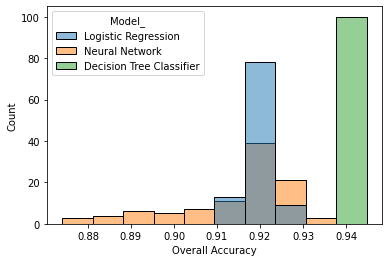

In [ ]:
sns.histplot(data=predictions_df.loc[predictions_df["Model_"] != "Random Forest Classifier"], x="Overall Accuracy", hue="Model_")

<AxesSubplot:xlabel='Precision', ylabel='Count'>

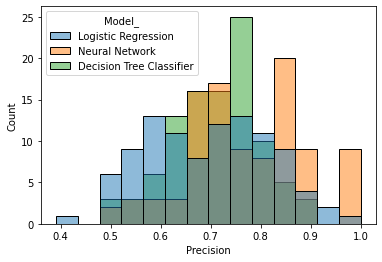

In [ ]:
sns.histplot(data=predictions_df.loc[predictions_df["Model_"] != "Random Forest Classifier"], x="Precision", hue="Model_")

<AxesSubplot:xlabel='Recall', ylabel='Count'>

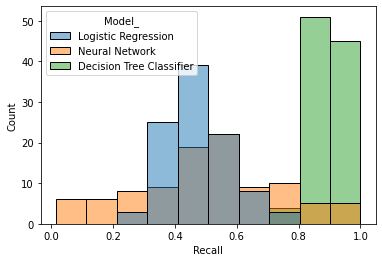

In [ ]:
sns.histplot(data=predictions_df.loc[predictions_df["Model_"] != "Random Forest Classifier"], x="Recall", hue="Model_")

In [ ]:
dt_rf_only = predictions_df[(predictions_df["Model"] == "Decision Tree Classifier") | (predictions_df["Model"] == "Random Forest Classifier")]

<AxesSubplot:xlabel='Recall', ylabel='Count'>

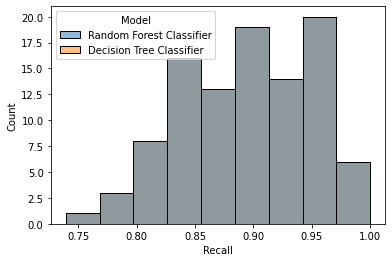

In [ ]:
sns.histplot(data=dt_rf_only, x="Recall", hue="Model")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b48f097f-607c-418a-bf15-19e0a2612faf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>